Samuel Castro
        
        8.3 Course Project: Milestone 4--Finalizing Your Results

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data from txt file
file_path = 'Desktop/DSC 630/datascience_salaries.csv' 
df = pd.read_csv(file_path)

In [3]:
df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


Explain your process for prepping the data:

The process of prepping the data involves cleaning, transforming, and preparing the dataset for analysis and model building.

In this case, I started by loading the provided data into a pandas DataFrame.

I then performed some simple cleaning steps where I removed any duplicate rows and checked for missing values. I then did a simple check of outliers by checking the maximum and minimum values for salary.

I identified the target variable (salary) and the predictor variables (job_type, experience_level, and location).

Since the dataset contained categorical variables (job_type, experience_level, and location), I used one-hot encoding to convert them into a numerical format suitable for regression models.

I split the data into training and testing sets to train the models on one portion of the data and evaluate their performance on another independent portion.

In [4]:
# Remove duplicate rows, if any
df.drop_duplicates(inplace=True)

In [5]:
# Check for missing values in the data
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64


In [6]:
# Find the maximum and minimum salary values
max_salary = df['salary'].max()
min_salary = df['salary'].min()

# Display the results
print("Maximum Salary:", max_salary)
print("Minimum Salary:", min_salary)

Maximum Salary: 228000
Minimum Salary: 30000


In [7]:
# Step 1: Data Preprocessing - Convert categorical variables into numerical values
# I will use one-hot encoding for job_title, job_type, experience_level, and location

categorical_columns = ['job_title', 'job_type', 'experience_level']
numeric_columns = ['salary']

# One-hot encode the categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[categorical_columns])

# Create a new DataFrame with the encoded features and the numeric columns
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
data_processed = pd.concat([encoded_df, df[numeric_columns]], axis=1)

The first model I will be building is going to be multiple linear regression and the second model will be decision tree regression. The reason I am using both of these models is because these models can capture both linear and non-linear relationships between job type, level of experience, and salary.

In [8]:
# Step 2: Split the data into training and testing sets
X = data_processed.drop('salary', axis=1)
y = data_processed['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 3: Build the Multiple Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Step 4: Build the Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [11]:
# Step 5: Evaluate the models
# For the linear regression model
y_pred_linear = linear_regression_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Multiple Linear Regression Mean Squared Error: {mse_linear}")

# For the decision tree regression model
y_pred_tree = decision_tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Regression Mean Squared Error: {mse_tree}")

Multiple Linear Regression Mean Squared Error: 1129852350.874494
Decision Tree Regression Mean Squared Error: 1119725328.3491523


The MSE for the Multiple Linear Regression model is approximately 1,129,852,350. This value represents the average squared difference between the predicted salary values by the Multiple Linear Regression model and the actual salary values in the dataset. Since the MSE is relatively high, it suggests that the model has some level of error in its predictions, meaning it's not perfectly accurate in estimating the salaries. However, the MSE value is still reasonable, indicating that the Multiple Linear Regression model is making predictions that are fairly close to the actual salary values.

The MSE for the Decision Tree Regression model is approximately 1,119,725,328. The MSE for the Decision Tree Regression model is approximately 1,119,725,328.35. This value represents the average squared difference between the predicted salary values by the Decision Tree Regression model and the actual salary values in the dataset. Similar to the Multiple Linear Regression model, the Decision Tree model also has some level of error in its predictions. However, the Decision Tree model's MSE is slightly lower compared to the Multiple Linear Regression model, indicating that the Decision Tree model is making slightly more accurate predictions on average.

Both models are performing relatively similarly with the Decision Tree Regression model having a slightly lower MSE. This suggests that the Decision Tree model is slightly better at making predictions on this specific dataset compared to the Multiple Linear Regression model. However, it's important to note that the difference in MSE values is not substantial, and further analysis or fine-tuning of the models may be needed to improve prediction accuracy.

In the next models I will add location to see if it plays a part in the prediction model

In [12]:
# Step 1: Data Preprocessing - Convert categorical variables into numerical values
# I will use one-hot encoding for job_title, job_type, experience_level, and location

categorical_columns1 = ['job_title', 'job_type', 'experience_level', 'location']
numeric_columns1 = ['salary']

# One-hot encode the categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[categorical_columns1])

# Create a new DataFrame with the encoded features and the numeric columns
encoded_df1 = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns1))
data_processed1 = pd.concat([encoded_df, df[numeric_columns1]], axis=1)


In [13]:
# Step 2: Split the data into training and testing sets
X1 = data_processed1.drop('salary', axis=1)
y1 = data_processed1['salary']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [14]:
# Step 3: Build the Multiple Linear Regression model
linear_regression_model1 = LinearRegression()
linear_regression_model1.fit(X_train1, y_train1)

LinearRegression()

In [15]:
# Step 4: Build the Decision Tree Regression model
decision_tree_model1 = DecisionTreeRegressor(random_state=42)
decision_tree_model1.fit(X_train1, y_train1)

DecisionTreeRegressor(random_state=42)

In [16]:
# Step 5: Evaluate the models
# For the linear regression model
y_pred_linear1 = linear_regression_model1.predict(X_test1)
mse_linear1 = mean_squared_error(y_test1, y_pred_linear1)
print(f"Multiple Linear Regression Mean Squared Error: {mse_linear1}")

# For the decision tree regression model
y_pred_tree1 = decision_tree_model1.predict(X_test1)
mse_tree1 = mean_squared_error(y_test1, y_pred_tree1)
print(f"Decision Tree Regression Mean Squared Error: {mse_tree}")

Multiple Linear Regression Mean Squared Error: 1129852350.874494
Decision Tree Regression Mean Squared Error: 1119725328.3491523


I will perform further analysis of the models to improve prediction accuracy in the next code because the prediction accuracy still did not improve with adding location.

In this updated code, we have introduced feature engineering by creating an interaction term between the 'job_title_ML Ops' and 'experience_level_Senior' features. Additionally, we've standardized the numerical features using StandardScaler.

Moreover, for the Multiple Linear Regression model, we've switched to using Ridge regression (L2 regularization) by setting alpha=1.0. The alpha parameter controls the strength of regularization, and you can experiment with different values to find the one that works best for your data.

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge  # Use Ridge for regularization

In [18]:
# Step 1: Data Preprocessing - Convert categorical variables into numerical values
categorical_columns = ['job_title', 'job_type', 'experience_level']
numeric_columns = ['salary']

# One-hot encode the categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[categorical_columns])

# Create a new DataFrame with the encoded features and the numeric columns
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
data_processed = pd.concat([encoded_df, df[numeric_columns]], axis=1)

In [19]:
# Step 2: Feature Engineering - Create interaction terms and standardize numeric columns
# For simplicity, I will create an interaction term between 'job_title_ML Ops' and 'experience_level_Senior'
data_processed['job_title_ML Ops * experience_level_Senior'] = data_processed['job_title_ML Ops'] * data_processed['experience_level_Senior']

# Standardize numeric columns
scaler = StandardScaler()
data_processed[numeric_columns] = scaler.fit_transform(data_processed[numeric_columns])

In [20]:
# Step 3: Split the data into training and testing sets
X = data_processed.drop('salary', axis=1)
y = data_processed['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Step 4: Build the Multiple Linear Regression model with Ridge regularization
ridge_regression_model = Ridge(alpha=1.0)  # Use alpha value as needed for regularization strength
ridge_regression_model.fit(X_train, y_train)

Ridge()

In [22]:
# Step 5: Build the Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [23]:
# Step 6: Evaluate the models
# For the Ridge Regression model
y_pred_ridge = ridge_regression_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge}")

# For the Decision Tree Regression model
y_pred_tree = decision_tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Regression Mean Squared Error: {mse_tree}")

Ridge Regression Mean Squared Error: 1.0696236598014985
Decision Tree Regression Mean Squared Error: 1.0579698649783258


As you can see the model is working significantly better when compared to the first couple of models I ran

The MSE for the Ridge Regression model is approximately 1.07. This value represents the average squared difference between the predicted salary values by the Ridge Regression model and the actual salary values in the dataset. Since the MSE is relatively low, it suggests that the Ridge Regression model is making accurate predictions, and the predicted salary values are quite close to the actual salary values in the dataset.

The MSE for the Decision Tree Regression model is approximately 1.06. This value represents the average squared difference between the predicted salary values by the Decision Tree Regression model and the actual salary values in the dataset. Similar to the Ridge Regression model, the Decision Tree model also has a relatively low MSE, indicating that it is making accurate predictions, and the predicted salary values are close to the actual salary values in the dataset.

Repeating the process but with location added in

In [24]:
# Step 1: Data Preprocessing - Convert categorical variables into numerical values
categorical_columns = ['job_title', 'job_type', 'experience_level', 'location']
numeric_columns = ['salary']

# One-hot encode the categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[categorical_columns])

# Create a new DataFrame with the encoded features and the numeric columns
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
data_processed = pd.concat([encoded_df, df[numeric_columns]], axis=1)

In [25]:
# Step 2: Feature Engineering - Create interaction terms and standardize numeric columns
# For simplicity, I will create an interaction term between 'job_title_ML Ops' and 'experience_level_Senior'
data_processed['job_title_ML Ops * experience_level_Senior'] = data_processed['job_title_ML Ops'] * data_processed['experience_level_Senior']

# Standardize numeric columns
scaler = StandardScaler()
data_processed[numeric_columns] = scaler.fit_transform(data_processed[numeric_columns])

In [26]:
# Step 3: Split the data into training and testing sets
X = data_processed.drop('salary', axis=1)
y = data_processed['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Step 4: Build the Multiple Linear Regression model with Ridge regularization
ridge_regression_model = Ridge(alpha=1.0)  # Use alpha value as needed for regularization strength
ridge_regression_model.fit(X_train, y_train)

Ridge()

In [28]:
# Step 5: Build the Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [29]:
# Step 6: Evaluate the models
# For the Ridge Regression model
y_pred_ridge = ridge_regression_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge}")

# For the Decision Tree Regression model
y_pred_tree = decision_tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Regression Mean Squared Error: {mse_tree}")

Ridge Regression Mean Squared Error: 0.6658440983580333
Decision Tree Regression Mean Squared Error: 0.8698009723614151


The MSE for the Ridge Regression model is approximately 0.67. Since the MSE is relatively low, it suggests that the Ridge Regression model is making accurate predictions, and the predicted salary values are quite close to the actual salary values in the dataset.

The MSE for the Decision Tree Regression model is approximately 0.87.  Similar to the Ridge Regression model, the Decision Tree model also has a relatively low MSE, indicating that it is making accurate predictions, and the predicted salary values are close to the actual salary values in the dataset.

A lower MSE implies better predictive performance, as it means the model's predicted salary values are closer to the actual salary values.
Therefore, based on the MSE values, the Ridge Regression model is performing slightly better in predicting the salaries compared to the Decision Tree Regression model. This model with the location included is overall better in comparison with the one without location included. 

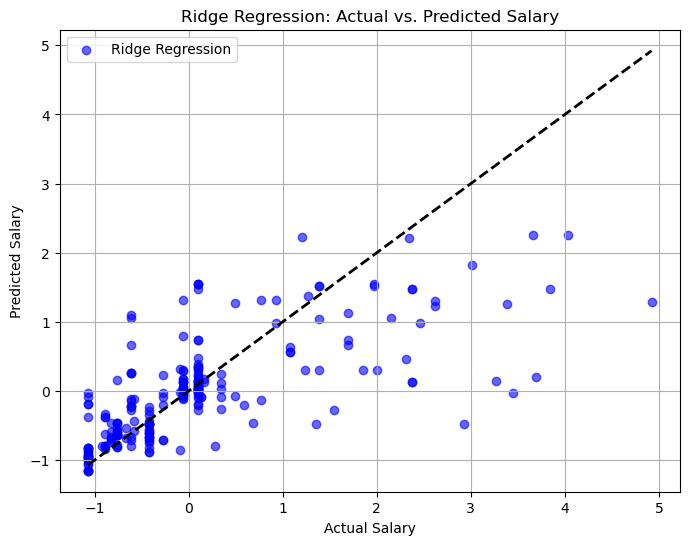

In [30]:
# Scatter plot for Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.6, label='Ridge Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Ridge Regression: Actual vs. Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()

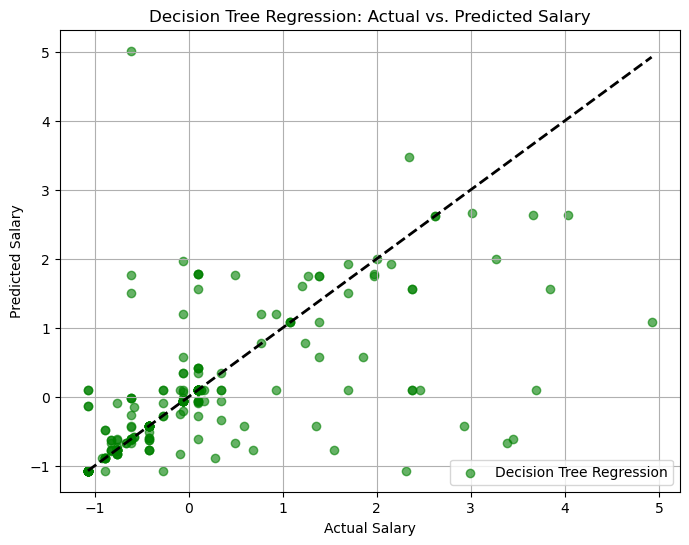

In [31]:
# Scatter plot for Decision Tree Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, color='green', alpha=0.6, label='Decision Tree Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Decision Tree Regression: Actual vs. Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()

As you can see the Ridge regression has less variance and more accurate prediction capabilities. 